In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.io import loadmat

sns.set(style="ticks", context="paper", palette="pastel")
plt.style.use('seaborn')

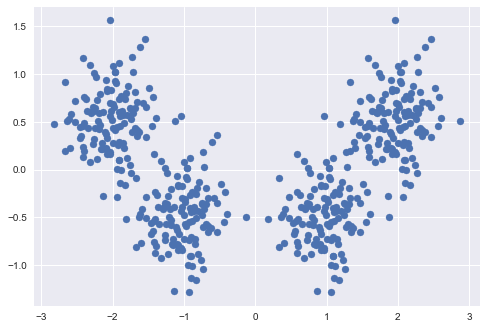

In [2]:
data = np.loadtxt('cluster.dat')

plt.scatter(data[0,:], data[1,:])

In [65]:
def cost(w, m, data):
    cost = 0
    for j in range(m.shape[0]):
        idx = m == j
        m_data = data[:,idx]
        if m_data.shape[1] != 0:
            e_dst = m_data - w[:,[j]]
            e_dst = np.linalg.norm(e_dst, axis=0)
            cost += np.sum(e_dst)
    return (cost**2)/data.shape[1]

def batch_k_means(data, m, max_iter=5):
    n_features = data.shape[0]
    n_data = data.shape[1]

    w = np.ones((n_features, m))
    w = np.multiply(w.T, np.mean(data, axis=1)).T + np.random.normal(scale=1e-3, size=w.shape)
    m_arr = np.zeros(n_data)
    costs = np.zeros(max_iter)
    for i in range(max_iter):
        for j in range(n_data):
            e_dst = w - data[:,[j]]
            e_dst = np.linalg.norm(e_dst, axis=0)
            arg_dst = np.argmax(e_dst)
            m_arr[j] = arg_dst
                        
        for j in range(m):
            idx = m_arr == j
            m_data = data[:,idx]
            if m_data.shape[1] != 0:
                w[:,j] = np.mean(m_data, axis=1)
            
        costs[i] = cost(w, m_arr, data)
    return w, m, costs

In [66]:
np.random.seed(1)
data_test = data[:,:]
batch_k_means(data_test, 8, 5)

(array([[ 1.46793666, -0.0326751 ,  0.617372  , -1.53206334, -0.03119793,
          1.46793666, -1.2848138 , -0.03282455],
        [ 0.02905982,  0.02881045, -0.7840475 ,  0.02905982,  0.0287374 ,
          0.02905982, -0.35037132,  0.02795992]]),
 8,
 array([182.71508237, 313.13698561, 309.27221199, 309.27221199,
        309.27221199]))